# Test My Images

## Imports

In [2]:
import tensorflow as tf
from keras.datasets import mnist
import keras
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

2024-05-16 10:35:33.190353: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 10:35:33.218004: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 10:35:33.218036: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 10:35:33.218060: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-16 10:35:33.223565: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 10:35:33.223988: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## Load model from disk

In [6]:
model = tf.keras.models.load_model("HandWriting_model.keras")

## Go and read in the images and labels

In [9]:
imgs_labels = np.load("mynumber.npz")

In [10]:
type(imgs_labels)

numpy.lib.npyio.NpzFile

In [11]:
imgs_labels.files

['image', 'labels']

In [14]:
imgs_labels["image"].shape

(10, 28, 28)

In [15]:
imgs_labels["labels"].shape

(10,)

In [18]:
images = imgs_labels['image']/255.

In [33]:
test_loss,test_acc=model.evaluate(images,imgs_labels["labels"],verbose=3)

print("\nTest accuracy:",test_acc*100,"%")


Test accuracy: 89.99999761581421 %


In [36]:
predictions = model.predict(images)

1/1 [==============================] - 0s 60ms/step


In [38]:
wrong = []
for i in range(len(predictions)):
    if predictions[i].argmax() != imgs_labels["labels"][i]:
        wrong.append(i)

(10-len(wrong))/10

0.9

In [39]:
print(wrong)

[3]


In [40]:
predictions[1]

array([1.4493486e-12, 9.5651883e-01, 2.4396459e-06, 1.5479711e-05,
       1.1266555e-10, 8.4463642e-10, 4.2628245e-11, 4.3378480e-02,
       1.9697688e-06, 8.2721243e-05], dtype=float32)

In [41]:
x_vals = np.arange(10)

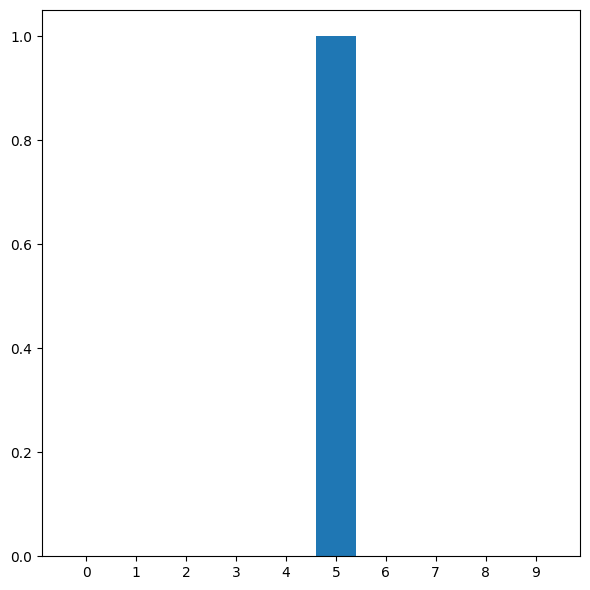

In [50]:
fig, ax = plt.subplots(1,1,figsize=(6,6),layout="tight")
ax.set_xticks(x_vals)
plt.bar(x_vals,predictions[5])
plt.show()